In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

In [2]:
file_path = 'train'

In [3]:
name_class = os.listdir(file_path)

In [4]:
name_class

['malignant', 'benign']

In [5]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [6]:
filepaths

['train/malignant/melanoma_7039.jpg',
 'train/malignant/melanoma_9014.jpg',
 'train/malignant/melanoma_6327.jpg',
 'train/malignant/melanoma_5148.jpg',
 'train/malignant/melanoma_6441.jpg',
 'train/malignant/melanoma_7987.jpg',
 'train/malignant/melanoma_6455.jpg',
 'train/malignant/melanoma_7993.jpg',
 'train/malignant/melanoma_8478.jpg',
 'train/malignant/melanoma_9000.jpg',
 'train/malignant/melanoma_6333.jpg',
 'train/malignant/melanoma_5612.jpg',
 'train/malignant/melanoma_7005.jpg',
 'train/malignant/melanoma_8336.jpg',
 'train/malignant/melanoma_9028.jpg',
 'train/malignant/melanoma_7763.jpg',
 'train/malignant/melanoma_8450.jpg',
 'train/malignant/melanoma_5174.jpg',
 'train/malignant/melanoma_5160.jpg',
 'train/malignant/melanoma_6469.jpg',
 'train/malignant/melanoma_7777.jpg',
 'train/malignant/melanoma_8444.jpg',
 'train/malignant/melanoma_7011.jpg',
 'train/malignant/melanoma_8322.jpg',
 'train/malignant/melanoma_5606.jpg',
 'train/malignant/melanoma_5835.jpg',
 'train/mali

In [7]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [8]:
labels

['malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'mali

In [9]:
filepath = pd. Series (filepaths, name='Filepath').astype(str)

labels = pd.Series (labels, name='Label')

data = pd.concat([filepath, labels], axis=1)

data = data.sample(frac=1).reset_index(drop=True)

data.head(5)

,Filepath,Label
0,train/benign/melanoma_1909.jpg,benign
1,train/malignant/melanoma_8070.jpg,malignant
2,train/benign/melanoma_1265.jpg,benign
3,train/benign/melanoma_786.jpg,benign
4,train/malignant/melanoma_5256.jpg,malignant


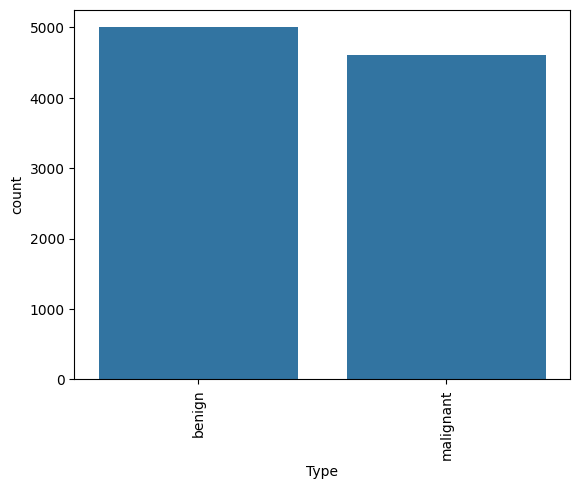

In [10]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [11]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

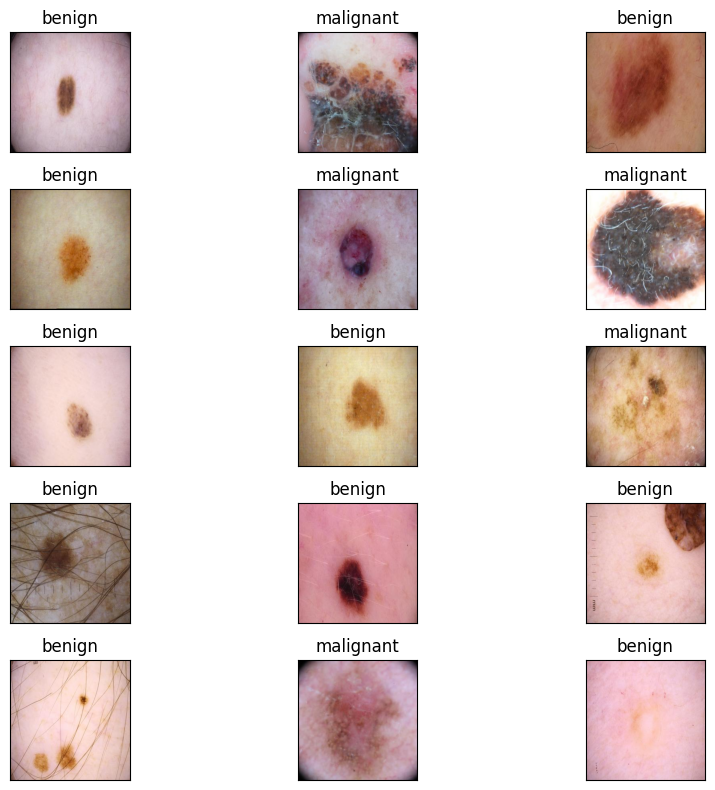

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [13]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [14]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed = 42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed = 42
)
test_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 7203 validated image filenames belonging to 2 classes.
Found 2402 validated image filenames belonging to 2 classes.
Found 2402 validated image filenames belonging to 2 classes.


In [15]:
pretrained_model = ResNet50(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [16]:
inputs = pretrained_model.input
x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                             min_delta=0,
                             patience=2,
                             mode='auto')]

In [19]:
history=model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=2
)

Epoch 1/2


/opt/homebrew/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


226/226 ━━━━━━━━━━━━━━━━━━━━ 76s 326ms/step - accuracy: 0.8818 - loss: 0.2960 - val_accuracy: 0.9142 - val_loss: 0.2132
Epoch 2/2
226/226 ━━━━━━━━━━━━━━━━━━━━ 79s 348ms/step - accuracy: 0.9240 - loss: 0.1901 - val_accuracy: 0.9163 - val_loss: 0.2100


In [20]:
model.save("model_resnet50.h5")

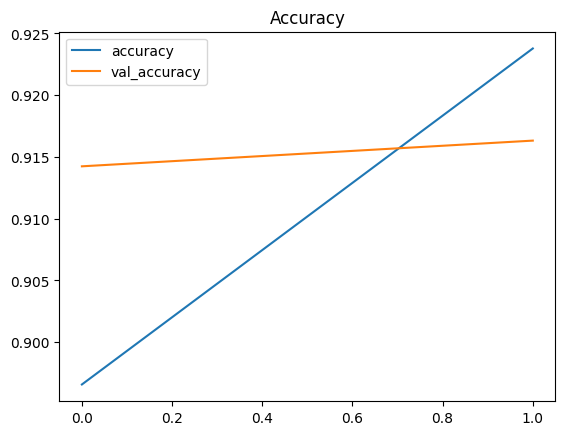

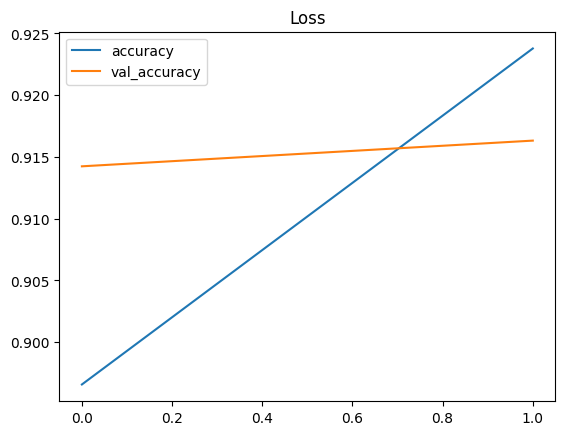

In [21]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Loss")
plt.show()

In [22]:
results = model.evaluate(test_gen, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

/opt/homebrew/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Loss: 0.21003
Test Accuracy: 91.63%


In [23]:
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 270ms/step


In [24]:
y_test = list(test.Label)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      benign       0.91      0.94      0.92      1251
   malignant       0.93      0.89      0.91      1151

    accuracy                           0.92      2402
   macro avg       0.92      0.92      0.92      2402
weighted avg       0.92      0.92      0.92      2402



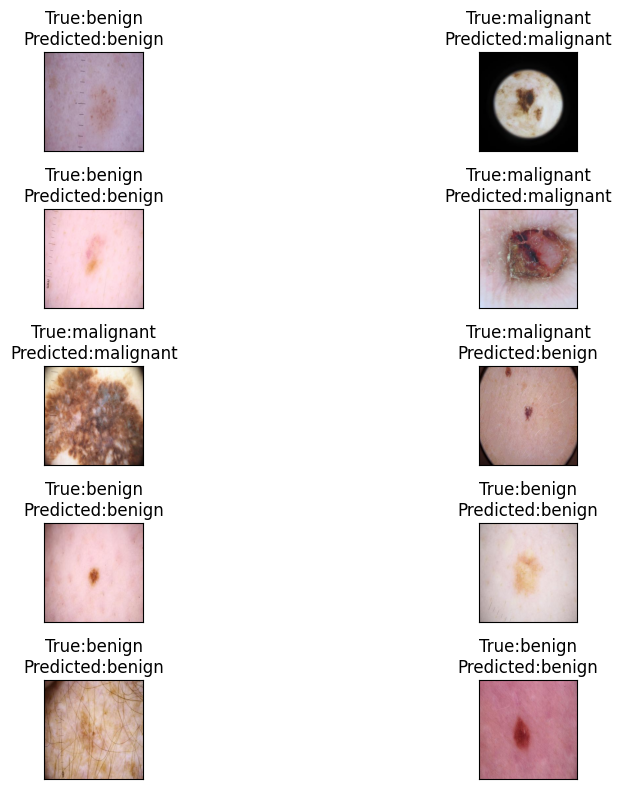

In [25]:
fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(12,8),subplot_kw={'xticks':[],'yticks':[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True:{test.Label.iloc[i]}\nPredicted:{pred[i]}")
plt.tight_layout()
plt.show()

In [26]:
from tensorflow.keras.models import load_model
loaded_model_imageNet = load_model("model_resnet50.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
[[87 12]]


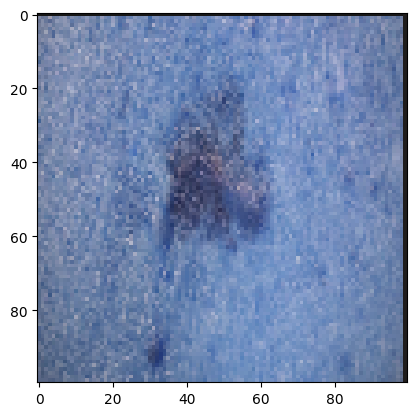

In [27]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
img_path = 'Screenshot 2024-04-01 at 9.55.01 PM.png'
img = cv2.imread(img_path)
img = cv2.resize(img,(100,100))

plt.imshow(img)
x = np.expand_dims(img,axis=0)
x = preprocess_input(x)
result = loaded_model_imageNet.predict(x)
print((result*100).astype('int'))
plt.imshow(img)

In [28]:
p = list((result*100).astype('int'))
pp = list(p[0])
pp


[87, 12]

In [29]:
max(pp)

87

In [30]:
index = pp.index(max(pp))

In [31]:
index

0

In [32]:
name_class = ['benign','melignant']

In [33]:
name_class[index]

'benign'

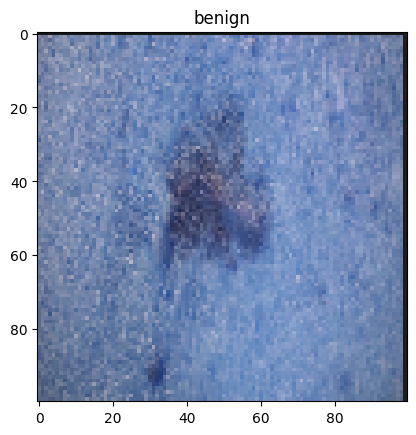

In [34]:
plt.title(name_class[index])
plt.imshow(img)